# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

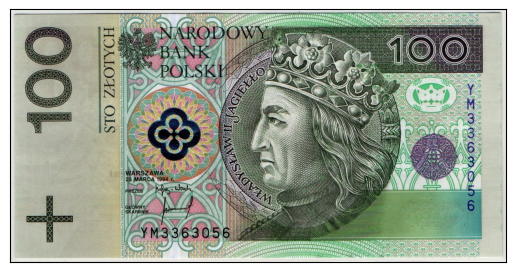

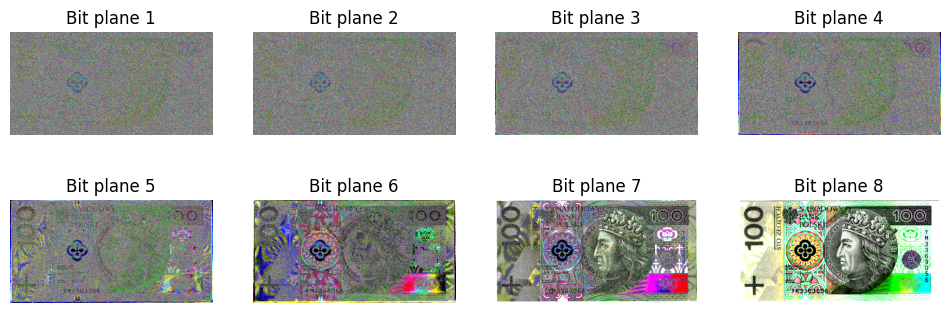

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

if not os.path.exists("100zloty.jpg"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg

sto_zloty = cv2.imread("100zloty.jpg").astype("uint8")

plt.imshow(sto_zloty)
plt.xticks([]), plt.yticks([])
plt.show()

bit_planes = []
fig, ax = plt.subplots(2, 4, figsize=(12, 4))
for i in range(8):
    bit_plane = (sto_zloty >> i) & 1 # przesunięcie o i bitów i wyciągnięcie najmłodszego
    bit_plane = bit_plane.astype("uint8")
    bit_planes.append(bit_plane)
    bit_plane = bit_plane * 255

    ax[i//4][i%4].imshow(bit_plane)
    ax[i//4][i%4].set_title(f"Bit plane {i+1}")
    ax[i//4][i%4].axis("off")

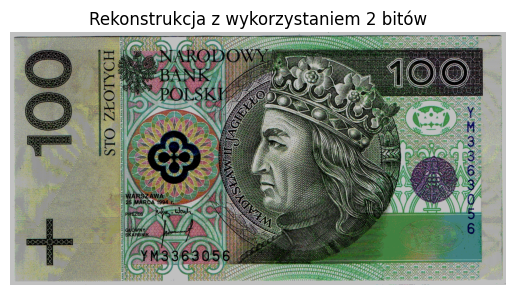

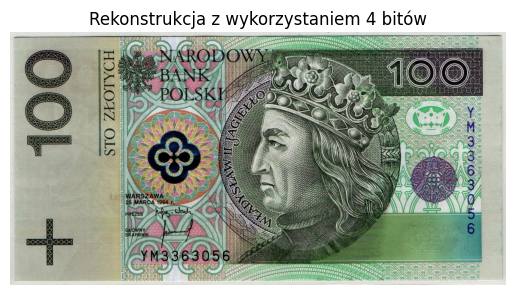

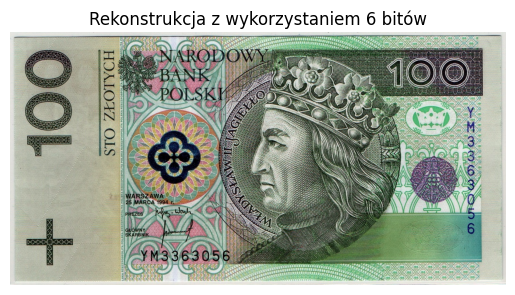

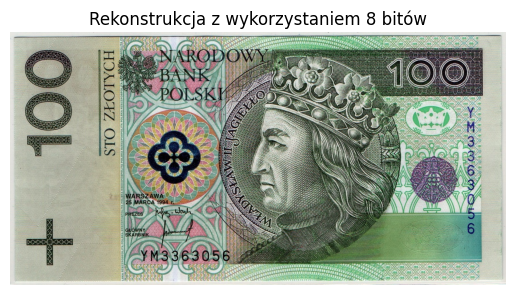

In [28]:
reconstruction_numbers = [2, 4, 6, 8]

for i in reconstruction_numbers:
    reconstructed = np.zeros_like(sto_zloty)
    for j in reversed(range(8-i, 8)):
        reconstructed += (bit_planes[j] << j)

    fig, ax = plt.subplots()
    ax.imshow(reconstructed)
    ax.axis("off")
    ax.set_title(f"Rekonstrukcja z wykorzystaniem {i} bitów")